In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
''' Sn properties - Masses, Ratios, Cup Configurations, ... '''
from sn_config import *
'''Classes for Reading in the Data and applying Internal Normalisation'''
from nu_data_reduction import NU_data_read, normalisation, evaluation
import pylab as plt
from scipy import stats
import xlwings as xw

In [5]:
path = "/Volumes/friebelm/PhD/NU Plasma/Measurements/2018-05-15/"
#path = "/Users/matthias/Desktop/PhD Temp/2017-02-22/"
#path_sav = "/Volumes/friebelm/PhD/NU Plasma/Measurements/compilation/"
files_start = 9873#8922
files_end = 9910#8970

In [15]:
# cup configuration
#cup_config = cycle_Sb
Sn_isotopes = ["117", "118", "119", "120", "122", "124"]
cup_config = cycles_spike

# Mass Range of cup configuration
mass_range = cycle_Sn_spike_mass_range

# Isotopes used for Interference correction
#corr_isotopes_1 = {"Cd" : "111", "Te" : "125"}
corr_isotopes_2 = {"Te" : "125", "Xe": "129"}
#corr_isotopes_2 = {}
corr_isotopes_Sb = {"Te": "125", "Xe": "129"}

norm_ratio = ["118","120"]
denom_isotope = norm_ratio[1]
Sn_monitor = ["125", "129"]


def eval_iso_list(isotopes_list,norm_ratio, monitor_iso):
    isotope_nom = norm_ratio[0]
    isotope_den = norm_ratio[1]
    isotopes_list.remove(norm_ratio[1])
    for i in range(len(monitor_iso)):
        isotopes_list.append(monitor_iso[i])
    isotopes_list.sort()
    return isotopes_list

isotope_ls = eval_iso_list(Sn_isotopes, norm_ratio, Sn_monitor)

data_sample_column = [(i + "/" + denom_isotope) for i in isotope_ls]    
isotopes = [isotope_ls]

#number of iterations for beta
iter_beta = 10

# Interference_corr on the denominator isotope
isotope_denom_corr = False
# background correction
blk_corr = True

In [16]:
database["Sn"]["Ratios"].get_all_abundances("120")

{'112': 0.9717950598570602,
 '114': 0.6583054217702042,
 '115': 0.3379051251334458,
 '116': 14.538460911587576,
 '117': 7.670602808269971,
 '118': 24.2177835366599,
 '119': 8.5871451971738,
 '120': 1.0658141036401503e-14,
 '122': 4.631640710950296,
 '124': 5.788915238491064}

In [17]:

mass_range.get_graph_of_corr(corr_isotopes_2)

{'117': set(),
 '118': set(),
 '119': set(),
 '120': {'125'},
 '121': set(),
 '122': {'125'},
 '123': {'125'},
 '124': {'125', '129'},
 '125': set(),
 '126': {'129'},
 '127': set(),
 '129': set(),
 '131': set()}

In [18]:
mass_range.get_mass_range()

{'117': ['Sn'],
 '118': ['Sn'],
 '119': ['Sn'],
 '120': ['Sn', 'Te'],
 '121': ['Sb'],
 '122': ['Sn', 'Te'],
 '123': ['Sb', 'Te'],
 '124': ['Sn', 'Te', 'Xe'],
 '125': ['Te'],
 '126': ['Te', 'Xe'],
 '127': ['I'],
 '129': ['Xe'],
 '131': ['Xe']}

In [19]:
mass_range.get_order_of_corr(corr_isotopes_2)

[{'117', '118', '119', '121', '125', '127', '129', '131'},
 {'120', '122', '123', '124', '126'}]

In [20]:
columns_1 = ["cycle", "sample", "date", "H8 (1)", "H7 (1)", "H6 (1)", "H5 (1)", "H4 (1)", "H3 (1)", "H2 (1)", "H1 (1)", "Ax (1)", "L1 (1)", "L2 (1)", "L3 (1)", "L4 (1)"]
df_all = pd.DataFrame()
blk_ls = []
sample_ls = []
files_1 = range(files_start, files_end, 1)
#files_1 = range(9588,9638,1) + range(9639,9749, 1)  + range(9753, 9760)

for sample in files_1:
    
    df = NU_data_read(path, sample, cup_config)
    cycles = range(1, len(df.data_read(sample).index)+1)
    df_zero = df.data_zero_corr(sample)
    df_zero_1 = pd.DataFrame(df_zero["cycle1"])
    sample_name = df.extract_metadata(sample, "Sample Name")
    date = df.extract_metadata(sample, "Date")
    starttime = df.extract_metadata(sample, "Start Time")
    df_zero_1["date"] = datetime.strptime(date+starttime, '%d/%m/%Y%H:%M')
    df_zero_1["sample"] = sample_name
    df_zero_1["cycle"] = df_zero_1.index.values
    df_zero_1.index = df_zero_1["date"]
    df_zero_1 = df_zero_1[columns_1]
    df_all = df_all.append(df_zero_1, ignore_index = True)
    
    if sample_name == "blank sol" or sample_name == "wash" or sample_name == "wash clean" or sample_name == "Teflon blk":
        blk_ls.append(sample)
    elif sample_name == "SQ" or sample_name == "Teflon blk" or sample_name == "4ml HDPE blank":
        None
    else:
        sample_ls.append(sample)

df_all.set_index("date", inplace = True)

#for x in [123]:
#    sample_ls.remove(x)
#blk_ls = blk_ls[0::5]
#blk_ls.remove(5234)
df_all

,cycle,sample,H8 (1),H7 (1),H6 (1),H5 (1),H4 (1),H3 (1),H2 (1),H1 (1),Ax (1),L1 (1),L2 (1),L3 (1),L4 (1)
date,,,,,,,,,,,,,,,
2018-05-15 10:26:00,1,blank sol,0.010048,0.012203,0.031615,0.000532,0.000181,0.000327,0.000381,0.000892,0.000478,0.002668,0.000226,0.000643,0.001102
2018-05-15 10:26:00,2,blank sol,0.010022,0.012205,0.031629,0.000527,0.000186,0.000363,0.000378,0.000910,0.000466,0.002688,0.000235,0.000636,0.001150
2018-05-15 10:26:00,3,blank sol,0.010006,0.012172,0.031583,0.000512,0.000198,0.000329,0.000395,0.000891,0.000457,0.002685,0.000221,0.000623,0.001098
2018-05-15 10:26:00,4,blank sol,0.010021,0.012201,0.031604,0.000517,0.000189,0.000336,0.000399,0.000951,0.000479,0.002712,0.000276,0.000669,0.001187
2018-05-15 10:26:00,5,blank sol,0.010047,0.012247,0.031642,0.000546,0.000193,0.000333,0.000365,0.000842,0.000474,0.002610,0.000219,0.000597,0.001047
2018-05-15 10:26:00,6,blank sol,0.009998,0.012176,0.031515,0.000532,0.000173,0.000360,0.000383,0.000946,0.000466,0.002703,0.000253,0.000648,0.001198
2018-05-15 10:26:00,7,blank sol,0.010039,0.012197,0.031548,0.000512,0.000199,0.000431,0.000373,0.001612,0.000459,0.003240,0.000381,0.001011,0.001962
2018-05-15 10:26:00,8,blank sol,0.010045,0.012216,0.031581,0.000530,0.000189,0.000327,0.000380,0.000907,0.000446,0.002690,0.000222,0.000629,0.001117
2018-05-15 10:26:00,9,blank sol,0.010023,0.012189,0.031497,0.000526,0.000183,0.000331,0.000389,0.000845,0.000463,0.002679,0.000224,0.000607,0.001106


In [21]:
blanks = df_all[df_all["sample"] == "blank sol"]
blanks.groupby(blanks.index).agg(mean)

,cycle,H8 (1),H7 (1),H6 (1),H5 (1),H4 (1),H3 (1),H2 (1),H1 (1),Ax (1),L1 (1),L2 (1),L3 (1),L4 (1)
date,,,,,,,,,,,,,,
2018-05-15 10:26:00,10.5,0.010016,0.012186,0.031538,0.000530,0.000183,0.000344,0.000382,0.000936,0.000464,0.002726,0.000245,0.000661,0.001178
2018-05-15 10:44:00,10.5,0.010134,0.012322,0.031720,0.000527,0.000169,0.000320,0.000380,0.000924,0.000472,0.002729,0.000252,0.000642,0.001175
2018-05-15 11:01:00,10.5,0.010155,0.012366,0.031449,0.000536,0.000182,0.000301,0.000379,0.000912,0.000468,0.002656,0.000254,0.000636,0.001140
2018-05-15 11:18:00,10.5,0.010182,0.012369,0.031113,0.000550,0.000182,0.000309,0.000365,0.000883,0.000470,0.002675,0.000219,0.000617,0.001107
2018-05-15 11:35:00,10.5,0.009884,0.012005,0.030328,0.000502,0.000175,0.000304,0.000355,0.000835,0.000449,0.003016,0.000224,0.000609,0.001069
2018-05-15 11:52:00,10.5,0.009885,0.012003,0.029839,0.000500,0.000182,0.000300,0.000366,0.000864,0.000439,0.003077,0.000238,0.000624,0.001118
2018-05-15 12:09:00,10.5,0.009724,0.011811,0.029518,0.000515,0.000172,0.000313,0.000330,0.000989,0.000426,0.003082,0.000225,0.000611,0.001260
2018-05-15 12:27:00,10.5,0.009725,0.011810,0.029418,0.000492,0.000179,0.000303,0.000329,0.000925,0.000432,0.003053,0.000219,0.000601,0.001158
2018-05-15 12:44:00,10.5,0.009693,0.011782,0.029319,0.000508,0.000177,0.000303,0.000362,0.000883,0.000447,0.003066,0.000216,0.000580,0.001107


In [22]:
files_1 = range(files_start, files_end, 1)
df_raw_signals = pd.DataFrame()
df_internal_norm = pd.DataFrame()

for sample in sample_ls:
    df = NU_data_read(path, sample, cup_config)
    cycles = range(1, len(df.data_read(sample).index)+1)
    # arbitrary blank positions
    blk1 = [item for item in blk_ls if item < sample]
    blk2 = [item for item in blk_ls if item > sample]
    blk1 = blk1[-1]
    blk2 = blk2[0]
    blk_corr_sample = True
    
    # blank measurement surrounds sample
    #if ((sample-1) in blk_ls) and ((sample+1) in blk_ls):
    #    blk1 = sample-1
    #    blk2 = sample+1
    #    blk_corr_sample = True
    #else:
    #    blk_corr_sample = False
    
    if (blk_corr == True) and (blk_corr_sample == True):
        blk_1 = NU_data_read(path, blk1, cup_config)
        blk_2 = NU_data_read(path, blk2, cup_config)
        df_zero = df.data_zero_corr(sample)
        df_bgd_1 = blk_1.data_zero_corr(blk1)
        df_bgd_2 = blk_2.data_zero_corr(blk2)   
        
        new_corr = evaluation(df_zero, cycles, isotopes, cup_config, database, mass_range, corr_isotopes_2 , denom_corr_ratio)
        df_bgd_1 = new_corr.mad_outlier_rejection_dict(df_bgd_1)
        df_bgd_2 = new_corr.mad_outlier_rejection_dict(df_bgd_2)
        df_bgd_corr = new_corr.data_bgd_corr_2(df_bgd_1, df_bgd_2)
        #new_corr.line2_corr(df_bgd_corr, "119")
    else:
        df_zero = df.data_zero_corr(sample)
        new_corr = evaluation(df_zero, cycles, isotopes, cup_config, database, mass_range, corr_isotopes_2 , denom_corr_ratio)
        #new_corr.line2_corr(df_zero, "119")
    
    data_sample_raw = new_corr.raw_signals(denom_isotope)
    data_sample_raw = pd.DataFrame.from_dict(data_sample_raw, orient = 'index')
    data_sample_raw = new_corr.mad_outlier_rejection(data_sample_raw)
    
    data_sample = new_corr.internal_norm_1(norm_ratio, denom_isotope, iter_beta)
    #data_sample = new_corr.raw_ratios_corr(denom_isotope)
    data_sample = pd.DataFrame.from_dict(data_sample, orient = 'index')
    data_sample = new_corr.mad_outlier_rejection(data_sample)
    
    sample_name = df.extract_metadata(sample, "Sample Name")
    date = df.extract_metadata(sample, "Date")
    starttime = df.extract_metadata(sample, "Start Time")
    data_sample = data_sample.drop(denom_isotope, axis=1)
    data_sample = data_sample[sorted(data_sample.columns)]
    data_sample.columns = data_sample_column
    data_sample["date"] = datetime.strptime(date+starttime, '%d/%m/%Y%H:%M')
    data_sample["sample"] = sample_name
    data_sample["cycle"] = data_sample.index.values
    
    data_sample_raw["cycle"] = data_sample_raw.index.values
    data_sample = data_sample.merge(data_sample_raw)
    
    df_internal_norm = df_internal_norm.append(data_sample)

nu_data_reduction.py:1022: RuntimeWarning: divide by zero encountered in divide
  modified_z_score = 0.6745 * diff / med_abs_deviation


In [23]:
df_internal_norm= df_internal_norm.set_index("date")
columns = ["cycle", "sample"]
columns.extend(data_sample_column)
columns.extend(sorted(data_sample_raw.drop("cycle", axis=1).columns))
df_internal_sub = pd.DataFrame(df_internal_norm, columns = columns)

df_internal_sub["Te/Sn"] = (df_internal_norm["125"]/7.0509)/(df_internal_norm["118"]/24.223)

#df_internal_sub["Te/Sn"] = (df_internal_norm["126"]/18.8066)/(df_internal_norm["118"]/24.223)
#df_internal_sub = df_internal_sub[df_internal_sub["118"] >= 7]
#df_external_sub.to_csv(path_sav + "Sn_H9_L4_internal_corr_all.csv")
#df_internal_sub["124/118"]

In [24]:
def SE(x):
    SE = np.std(x) / x.count()
    return SE

def SD2(x):
    SD2 = 2 * np.std(x)
    return SD2

df_internal_norm_mean = df_internal_sub.drop("cycle", axis=1).groupby(df_internal_sub.index).mean()
df_internal_norm_mean_sd = df_internal_sub.drop("cycle", axis=1).groupby(df_internal_sub.index).agg([np.mean, SD2])
df_internal_norm_mean["sample"] = df_internal_sub[~df_internal_sub.index.duplicated(keep='first')]["sample"]
df_internal_norm_mean_sd["sample"] = df_internal_sub[~df_internal_sub.index.duplicated(keep='first')]["sample"]
#df_internal_norm_mean_sd = df_internal_norm_mean_sd[1:8]
#df_internal_norm_mean = df_internal_norm_mean[df_internal_norm_mean["118"] >= 7]
df_internal_norm_mean_sd
#epsilon = epsilon.drop(["118"], axis = 1)
#plotplot = df_internal_norm_mean[(df_internal_norm_mean["125"] < 0.00010)  & (df_internal_norm_mean["124/120"] > 0.17745)] 
#plot(plotplot["125"], plotplot["124/120"], "ro")

117/120             118/120                 119/120  \
                         mean       SD2      mean           SD2      mean   
date                                                                        
2018-05-15 10:32:00  1.719977  0.000338  0.742935  0.000000e+00  0.267479   
2018-05-15 10:49:00  1.719966  0.000374  0.742935  2.220446e-16  0.267483   
2018-05-15 11:06:00  1.719965  0.000334  0.742935  6.661338e-16  0.267486   
2018-05-15 11:23:00  1.719958  0.000167  0.742935  4.440892e-16  0.267499   
2018-05-15 11:40:00  1.720045  0.000247  0.742935  4.440892e-16  0.267483   
2018-05-15 11:57:00  4.677031  0.001054  0.742935  2.220446e-16  0.275027   
2018-05-15 12:15:00  1.719964  0.000188  0.742935  0.000000e+00  0.267480   
2018-05-15 12:32:00  1.783871  0.000285  0.742935  4.440892e-16  0.267646   
2018-05-15 12:49:00  1.719953  0.000314  0.742935  4.440892e-16  0.267480   
2018-05-15 13:06:00  1.729617  0.000321  0.742935  0.000000e+00  0.267513   
2018-05-15 13:23:00  1.719990  0.000361  0.742935  4.440892e-16  0.267494   
2018-05-15 13:40:00  1.392020  0.000288  0.742935  2.220446e-16  0.266603   
2018-05-15 14:04:00  1.720001  0.000253  0.742935  2.220446e-16  0.267485   
2018-05-15 14:21:00  1.664533  0.000357  0.742935  0.000000e+00  0.267327   
2018-05-15 14:38:00  1.720034  0.000274  0.742935  2.220446e-16  0.267487   
2018-05-15 14:55:00  1.720010  0.000272  0.742935  0.000000e+00  0.267492   
2018-05-15 15:13:00  1.943851  0.000409  0.742935  0.000000e+00  0.268134   
2018-05-15 15:30:00  1.719937  0.000172  0.742935  4.440892e-16  0.267489   

                                122/120             124/120            \
                          SD2      mean       SD2      mean       SD2   
date                                                                    
2018-05-15 10:32:00  0.000040  1.248007  0.000299  0.175199  0.000032   
2018-05-15 10:49:00  0.000048  1.248000  0.000328  0.175199  0.000059   
2018-05-15 11:06:00  0.000046  1.248005  0.000342  0.175195  0.000040   
2018-05-15 11:23:00  0.000031  1.248094  0.000224  0.175220  0.000055   
2018-05-15 11:40:00  0.000039  1.247969  0.000210  0.175190  0.000037   
2018-05-15 11:57:00  0.000038  3.041051  0.000911  0.169682  0.000045   
2018-05-15 12:15:00  0.000028  1.247963  0.000194  0.175204  0.000047   
2018-05-15 12:32:00  0.000038  1.291745  0.000316  0.175092  0.000047   
2018-05-15 12:49:00  0.000034  1.248010  0.000357  0.175205  0.000049   
2018-05-15 13:06:00  0.000032  1.254662  0.000290  0.175188  0.000042   
2018-05-15 13:23:00  0.000034  1.247968  0.000288  0.175204  0.000037   
2018-05-15 13:40:00  0.000035  1.016901  0.000216  0.175753  0.000043   
2018-05-15 14:04:00  0.000041  1.247980  0.000213  0.175191  0.000057   
2018-05-15 14:21:00  0.000037  1.209012  0.000340  0.175285  0.000045   
2018-05-15 14:38:00  0.000052  1.247977  0.000212  0.175200  0.000046   
2018-05-15 14:55:00  0.000039  1.247964  0.000325  0.175203  0.000052   
2018-05-15 15:13:00  0.000048  1.398903  0.000373  0.174791  0.000051   
2018-05-15 15:30:00  0.000037  1.248043  0.000189  0.175202  0.000034   

                               ...                   122       124            \
                               ...                   SD2      mean       SD2   
date                           ...                                             
2018-05-15 10:32:00            ...              0.353563  0.596765  0.052503   
2018-05-15 10:49:00            ...              0.099420  0.617488  0.014748   
2018-05-15 11:06:00            ...              0.213379  0.612961  0.031661   
2018-05-15 11:23:00            ...              0.298732  0.607719  0.044279   
2018-05-15 11:40:00            ...              0.171837  0.595839  0.025480   
2018-05-15 11:57:00            ...              0.633479  0.726865  0.039294   
2018-05-15 12:15:00            ...              0.243363  0.588373  0.036130   
2018-05-15 12:32:00            ...              0.119416  0.567246  0.

In [25]:
df_internal_norm_sample_sd = df_internal_norm_mean.groupby(df_internal_norm_mean["sample"]).agg([np.mean, SD2])
df_internal_norm_sample_sd

117/120             118/120                \
                               mean       SD2      mean           SD2   
sample                                                                  
10017,414 DS aliq          1.943851  0.000000  0.742935  0.000000e+00   
BHVO-2 DS 1_1 40ppb        1.392020  0.000000  0.742935  0.000000e+00   
Murchison b. 2 DS 40ppb    1.664533  0.000000  0.742935  0.000000e+00   
NIST + DS 0.25-0.75 40ppb  4.677031  0.000000  0.742935  0.000000e+00   
NIST + DS 0.5-0.5 40ppb    1.719983  0.000064  0.742935  2.563950e-16   
NIST + DS 0.5-0.5 60ppb    1.729617  0.000000  0.742935  0.000000e+00   
SPEX1 + DS 0.5-0.5 40ppb   1.783871  0.000000  0.742935  0.000000e+00   

                            119/120             122/120             124/120  \
                               mean       SD2      mean       SD2      mean   
sample                                                                        
10017,414 DS aliq          0.268134  0.000000  1.398903  0.000000  0.174791   
BHVO-2 DS 1_1 40ppb        0.266603  0.000000  1.016901  0.000000  0.175753   
Murchison b. 2 DS 40ppb    0.267327  0.000000  1.209012  0.000000  0.175285   
NIST + DS 0.25-0.75 40ppb  0.275027  0.000000  3.041051  0.000000  0.169682   
NIST + DS 0.5-0.5 40ppb    0.267486  0.000012  1.247998  0.000074  0.175201   
NIST + DS 0.5-0.5 60ppb    0.267513  0.000000  1.254662  0.000000  0.175188   
SPEX1 + DS 0.5-0.5 40ppb   0.267646  0.000000  1.291745  0.000000  0.175092   

                                       ...           122                 124  \
                                SD2    ...          mean       SD2      mean   
sample                                 ...                                     
10017,414 DS aliq          0.000000    ...      4.346427  0.000000  0.575968   
BHVO-2 DS 1_1 40ppb        0.000000    ...      3.296258  0.000000  0.597960   
Murchison b. 2 DS 40ppb    0.000000    ...      3.666818  0.000000  0.560803   
NIST + DS 0.25-0.75 40ppb  0.000000    ...     11.718042  0.000000  0.726865   
NIST + DS 0.5-0.5 40ppb    0.000015    ...      4.094602  0.305059  0.606860   
NIST + DS 0.5-0.5 60ppb    0.000000    ...      6.500447  0.000000  0.958670   
SPEX1 + DS 0.5-0.5 40ppb   0.000000    ...      3.957268  0.000000  0.567246   

                                              125                129          \
                                SD2          mean      SD2      mean     SD2   
sample                                                                         
10017,414 DS aliq          0.000000  8.642025e-07  0.00000  0.000193  0.0000   
BHVO-2 DS 1_1 40ppb        0.000000  7.453118e-06  0.00000  0.000070  0.0000   
Murchison b. 2 DS 40ppb    0.000000 -8.950757e-06  0.00000  0.000021  0.0000   
NIST + DS 0.25-0.75 40ppb  0.000000 -2.694356e-05  0.00000 -0.000097  0.0000   
NIST + DS 0.5-0.5 40ppb    0.044983 -1.256842e-05  0.00002  0.000051  0.0002   
NIST + DS 0.5-0.5 60ppb    0.000000 -1.925196e-05  0.00000  0.000028  0.0000   
SPEX1 + DS 0.5-0.5 40ppb   0.000000 -1.164030e-05  0.00000  0.000024  0.0000   

                              Te/Sn            
                               mean       SD2  
sample                                         
10017,414 DS aliq          0.000001  0.000000  
BHVO-2 DS 1_1 40ppb        0.000008  0.000000  
Murchison b. 2 DS 40ppb   -0.000014  0.000000  
NIST + DS 0.25-0.75 40ppb -0.000040  0.000000  
NIST + DS 0.5-0.5 40ppb   -0.000020  0.000032  
NIST + DS 0.5-0.5 60ppb   -0.000019  0.000000  
SPEX1 + DS 0.5-0.5 40ppb  -0.000019  0.000000  

[7 rows x 32 columns]

In [251]:
df_internal_norm_mean = df_internal_norm_mean[2:]

In [26]:
# variation of standard data + mean + 2SD
sel_ratio = "119/118"
plot_Nist = df_internal_norm_mean[df_internal_norm_mean["sample"] == "NIST 0ppb"]
#plot_Nist = plot_Nist[(plot_Nist["118"] >= .5)]
#dataplot = plt.plot(plot_Nist["Te/Sn"], plot_Nist["124/118"], "ro")
plt.plot(plot_Nist.index, plot_Nist[sel_ratio], linestyle='-', marker='o', color='b')
plt.plot(plot_Nist.index, pd.rolling_mean(plot_Nist[sel_ratio], 2), linestyle='-', color='r')
plt.axhline(plot_Nist[sel_ratio].mean(), color='r', linestyle='-')
plt.axhline(plot_Nist[sel_ratio].mean()+ 2*plot_Nist[sel_ratio].std(), color='r', linestyle='--')
plt.axhline(plot_Nist[sel_ratio].mean()- 2*plot_Nist[sel_ratio].std(), color='r', linestyle='--')
#dataplot = plt.plot(plot_Nist.index, plot_Nist["120"], "ro")
plt.show()

KeyError: '119/118'

/Users/marf/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=2,center=False).mean()
  import sys


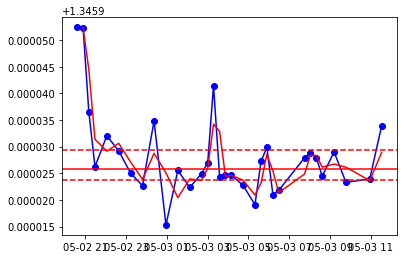

In [253]:
# variation of standard data + meadian + 25% quantile + 75% quantile
sel_ratio = "120/118"
plot_Nist = df_internal_norm_mean[df_internal_norm_mean["sample"] == "NIST 200ppb"]
plot_Nist = plot_Nist[(plot_Nist["118"] >= .5)]
#dataplot = plt.plot(plot_Nist["Te/Sn"], plot_Nist["124/118"], "ro")
plt.plot(plot_Nist.index, plot_Nist[sel_ratio], linestyle='-', marker='o', color='b')
plt.plot(plot_Nist.index, pd.rolling_mean(plot_Nist[sel_ratio], 2), linestyle='-', color='r')
plt.axhline(plot_Nist[sel_ratio].median(), color='r', linestyle='-')
plt.axhline(plot_Nist[sel_ratio].quantile(0.25), color='r', linestyle='--')
plt.axhline(plot_Nist[sel_ratio].quantile(0.75), color='r', linestyle='--')
#dataplot = plt.plot(plot_Nist.index, plot_Nist["120"], "ro")
plt.show()

/Users/marf/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=2,center=False).mean()
  


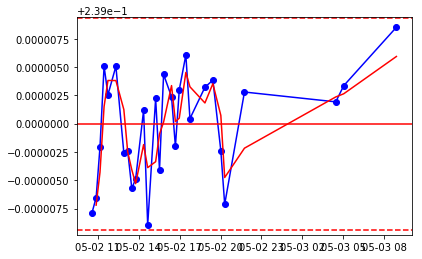

In [254]:
# outlier corr variation of standard data + meadian + 25% quantile + 75% quantile
sel_ratio = "124/118"
plot_Nist = df_internal_norm_mean[df_internal_norm_mean["sample"] == "NIST 45ppb"]
plot_Nist = new_corr.mad_outlier_rejection(plot_Nist.drop("sample", axis=1))
plot_Nist = plot_Nist[(plot_Nist["118"] >= .5)]
#dataplot = plt.plot(plot_Nist["Te/Sn"], plot_Nist["124/118"], "ro")
plt.plot(plot_Nist.index, plot_Nist[sel_ratio], linestyle='-', marker='o', color='b')
plt.plot(plot_Nist.index, pd.rolling_mean(plot_Nist[sel_ratio], 2), linestyle='-', color='r')
plt.axhline(plot_Nist[sel_ratio].mean(), color='r', linestyle='-')
plt.axhline(plot_Nist[sel_ratio].mean()+ 2*plot_Nist[sel_ratio].std(), color='r', linestyle='--')
plt.axhline(plot_Nist[sel_ratio].mean()- 2*plot_Nist[sel_ratio].std(), color='r', linestyle='--')
#dataplot = plt.plot(plot_Nist.index, plot_Nist["120"], "ro")
plt.show()

In [258]:
std_used = "NIST 45ppb"
sub_index = df_internal_norm_mean[(df_internal_norm_mean["sample"].shift(1) == df_internal_norm_mean["sample"].shift(-1)) & (df_internal_norm_mean["sample"].shift(1) == std_used)].index
#corr_values = df_internal_norm_mean[(df_external_norm_mean >= 0.74289)]
#corr_values = df_internal_norm_mean[:"20150110 10:00"]
corr_values = df_internal_norm_mean[df_internal_norm_mean["118"] >= 0.1]
corr_values_2 = corr_values[corr_values["sample"] == std_used]
#corr_values = df_internal_norm_mean
sample = corr_values["sample"]
sample_2 = corr_values_2["sample"]
std_mean = corr_values[(corr_values["sample"] == std_used)].mean()
new = corr_values[corr_values.columns[corr_values.dtypes != 'object']]
new_2 = corr_values_2[corr_values_2.columns[corr_values_2.dtypes != 'object']]

#std_mean["112/120", "114/120", "115/120", "117/120", "118/120", "119/120", "122/120", "124/120"] = [0.029823, 0.020189, 0.010372, 0.235299, 0.742923, 0.263443, 0.142078, 0.177546]
#print std_mean
#epsilon =  ((new / std_mean)-1)*10000
#new["sample"] = sample
epsilon_NIST =  ((new / ((new.shift(1) + new.shift(-1))/2))-1)*10000
epsilon_2 = ((new_2 / ((new_2.shift(1) + new_2.shift(-1))/2))-1)*10000
epsilon_NIST["sample"] = sample
epsilon_2["sample"] = sample

epsilon_NIST = epsilon_NIST[new.index.isin(sub_index)]
epsilon_NIST= epsilon_NIST[epsilon_NIST["sample"] != std_used]
epsilon_2 = epsilon_2[epsilon_2["sample"] == std_used]
epsilon_comp = epsilon_NIST.append(epsilon_2, ignore_index=False)
#epsilon_comp.index = epsilon_comp["Date"]
#epsilon_comp.columns
epsilon_comp = epsilon_comp.sort_index(axis=0)

In [259]:
#epsilon_comp = epsilon_comp.drop([datetime.strptime("2017-02-24 15:18", "%Y-%m-%d %H:%M")])
epsilon_comp

,117/118,119/118,120/118,122/118,124/118,125/118,129/118,117,118,119,120,122,124,125,129,Te/Sn,sample
date,,,,,,,,,,,,,,,,,
2018-05-02 10:34:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NIST 45ppb
2018-05-02 10:52:00,0.094339,0.092817,-0.246761,-1.110223e-12,-0.065825,18798.915876,-23787.101750,268.931265,267.001578,265.200205,263.100049,259.653300,255.977465,19481.559429,-2.434388e+04,17796.197281,NIST 45ppb
2018-05-02 11:09:00,0.046901,-0.303729,0.170052,2.220446e-12,-0.055738,-6330.972691,-35449.002630,-37.433464,-35.584199,-34.027895,-31.686741,-28.103100,-24.583617,-6418.270848,-3.508082e+04,-6255.758236,NIST 45ppb
2018-05-02 11:27:00,-0.069927,0.195508,0.044859,-1.110223e-12,0.202343,-7264.761210,-20378.720601,-227.718221,-227.684551,-227.374932,-227.571779,-227.551131,-227.148211,-7258.991097,-1.990919e+04,-6259.746578,NIST 45ppb
2018-05-02 11:44:00,0.036817,-0.021260,0.001738,0.000000e+00,-0.105748,30473.090041,33523.965684,251.114016,251.147976,251.077326,251.236499,251.235340,251.157360,30726.609147,3.583681e+04,25030.875327,NIST 45ppb
2018-05-02 12:02:00,0.364981,0.187252,-0.242407,0.000000e+00,-0.053807,13608.066808,-99268.037450,-7576.590641,-7576.616563,-7576.460349,-7576.491389,-7576.223372,-7576.010796,-5566.579092,-3.121771e+04,17900.488024,NIST 12ppb
2018-05-02 12:19:00,-0.092024,0.054838,-0.148636,0.000000e+00,0.212803,-5544.109731,-15440.066748,-296.081871,-296.007790,-295.985965,-296.267813,-296.149081,-296.108940,-5630.522836,-1.368047e+04,-5482.694321,NIST 45ppb
2018-05-02 12:36:00,0.187951,-0.607725,-1.093476,0.000000e+00,0.755318,-39910.863589,-136070.396918,-7599.637963,-7599.686791,-7599.828009,-7599.943001,-7599.662830,-7599.448683,-16990.666441,-3.973404e+04,-40087.786618,NIST 12ppb
2018-05-02 12:54:00,0.023868,-0.052490,0.073220,0.000000e+00,-0.163609,-2939.888338,35684.830438,270.921880,270.949276,270.923709,271.115877,271.191725,271.148547,-2685.500402,3.552262e+04,-2793.395412,NIST 45ppb


In [260]:
def SD2(x):
    SD2 = np.nanstd(x, ddof=1) * 2
    return SD2

epsilon = epsilon_comp.drop(["117", "118", "119", "120", "122", "124", "Te/Sn"], axis = 1)
#epsilon = epsilon.drop(["118"], axis = 1)
epsilon_sum = np.round(epsilon.groupby("sample").agg([np.mean, SD2]), decimals=2)
epsilon_sum

117/118       119/118       120/118       122/118       \
                         mean   SD2    mean   SD2    mean   SD2    mean  SD2   
sample                                                                         
15016, 55 ns             0.01   NaN    0.14   NaN    0.25   NaN     0.0  NaN   
GRA06100 bomb 2 45ppb    0.05   NaN    0.05   NaN    0.13   NaN    -0.0  NaN   
NIST 12ppb               0.28  0.25   -0.21  1.12   -0.67  1.20     0.0  0.0   
NIST 200ppb             -0.01   NaN   -0.06   NaN   -0.25   NaN     0.0  NaN   
NIST 45ppb               0.00  0.32   -0.01  0.26   -0.01  0.22     0.0  0.0   
NIST 55ppb              -0.14  0.02    0.01  0.04   -0.08  0.09    -0.0  0.0   
ZH09-04 23.3_3b_3        0.01  0.06   -0.02  0.09   -0.04  0.00     0.0  0.0   

                      124/118         125/118              129/118             \
                         mean   SD2      mean       SD2       mean        SD2   
sample                                                                          
15016, 55 ns             0.04   NaN  -2328.28       NaN  -64363.35        NaN   
GRA06100 bomb 2 45ppb   -0.34   NaN  98175.07       NaN  -11801.98        NaN   
NIST 12ppb               0.35  1.14 -13151.40  75687.20 -117669.22   52046.40   
NIST 200ppb             -0.00   NaN  -2090.77       NaN  -13643.37        NaN   
NIST 45ppb              -0.00  0.43 -10592.90  73664.21   -1870.98  124226.55   
NIST 55ppb              -0.31  0.26  41772.71  36925.48  269019.34  838389.21   
ZH09-04 23.3_3b_3       -0.22  0.14 -16256.35  31679.68  -24250.88   14394.20   

                            125                   129               
                           mean       SD2        mean          SD2  
sample                                                              
15016, 55 ns            -384.42       NaN   -87259.24          NaN  
GRA06100 bomb 2 45ppb  92661.13       NaN   -11778.77          NaN  
NIST 12ppb            -11278.62  16156.10   -35475.88     12043.91  
NIST 200ppb            28833.02       NaN   -28612.04          NaN  
NIST 45ppb            -11913.74  86328.80    -2323.40    119301.83  
NIST 55ppb             53895.99  38480.12 -5707181.41  16053061.03  
ZH09-04 23.3_3b_3     -16466.60  33860.44   -24782.18     13743.65

In [585]:
### sel_ratio = "112/118"
std = "NIST 100ppb"

def plot_epsilon(sel_ratio, std, xlim):
    x = range(1, len(epsilon_sum.index)+1)
    plt.errorbar(epsilon_sum[sel_ratio]["mean"], x, xerr = epsilon_sum[sel_ratio]["SD2"], ls='none', marker="o")
    plt.title("samples" + ", 2SD = " + str(np.round((2*epsilon_comp[epsilon_comp["sample"]== std][sel_ratio].std()),2)) + ", n= " +  str((epsilon_comp[epsilon_comp["sample"]== std][sel_ratio].count())))
    plt.xlim(xlim)
    plt.ylim([0.5, len(epsilon_sum.index)+1])
    plt.yticks(x, epsilon_sum.index, size='small', rotation=0)
    plt.axvline(epsilon_comp[epsilon_comp["sample"]== std][sel_ratio].mean(), color='k', linestyle='-')
    plt.axvline(epsilon_comp[epsilon_comp["sample"]== std][sel_ratio].mean()+ 2*epsilon_comp[epsilon_comp["sample"]== std][sel_ratio].std(), color='r', linestyle='--')
    plt.axvline(epsilon_comp[epsilon_comp["sample"]== std][sel_ratio].mean()- 2*epsilon_comp[epsilon_comp["sample"]== std][sel_ratio].std(), color='r', linestyle='--')
    #plt.axvline(plot_Nist[sel_ratio].mean()- 2*plot_Nist[sel_ratio].std(), color='r', linestyle='--')
    plt.ylabel(r'$\mathregular{\epsilon^{'+sel_ratio+'}}$Sn$_{NIST}$')
    #savefig(path+"epsilon_118.pdf", bbox_inches='tight')

In [ ]:
wb = xw.books.add()
#wb.sheets.add()
wb.sheets["Sheet1"].range('A1').value = df_all
df_all_mean = df_all.drop("cycle", axis=1).groupby(df_all.index).mean()
df_all_mean["sample"] = df_all[~df_all.index.duplicated(keep='first')]["sample"]
wb.sheets["Sheet1"].range('A344').value = df_all_mean

In [ ]:
#wb.sheets.add()
wb.sheets[3].range('AF1').value = df_internal_sub
#df_all_mean = df_all.drop("cycle", axis=1).groupby(df_all.index).mean()
#df_all_mean["sample"] = df_all[~df_all.index.duplicated(keep='first')]["sample"]
#xw.Range('A344').value = df_all_mean

In [ ]:
#wb.sheets.add()
wb.sheets[4].range('A21').value = df_internal_norm_mean_sd

In [ ]:
wb.sheets[4].range('BF21').value = epsilon_comp

In [ ]:
#epsilon_comp[epsilon_comp["sample"]== "NIST 200ppb"]["117/118"].std()
wb.sheets[4].range('BF36').value = epsilon_sum

In [ ]:
#sel_ratio = ["116/118", "117/118", "119/118", "120/118", "122/118", "124/118"]
#sel_ratio = ["116/117", "118/117", "119/117", "120/117", "122/117", "124/117"]
sel_ratio = ["116/120", "117/120", "118/120", "119/120", "122/120", "124/120"]
#sel_ratio = ["112/120", "114/120", "115/120"]
#sel_ratio = ["112/118", "114/118", "115/118"]
xlim = [-1, 1]

fig = plt.figure(figsize=(10,15))

for i in range(len(sel_ratio)):
    ax = plt.subplot(5,2,i+1)
    plot_epsilon(sel_ratio[i], "NIST 200ppb", xlim)
fig.tight_layout()
#wb.sheets[4].pictures.add(fig, name= '116/120 norm - bgd_corr 1', update = True)
#savefig(path+"epsilon_x_bgd_118_2_100ppb.pdf", bbox_inches='tight')

In [ ]:
sel_ratio = "116/118"
epsilon_comp = epsilon_comp[epsilon_comp["sample"] == "NIST 200ppb"]
x = epsilon_comp.index
plt.plot(x, epsilon_comp[sel_ratio], marker="o")
plt.ylim([-0.5, 0.5])
#plt.xticks(x, epsilon_comp["sample"], size='small', rotation=90)
plt.axhline(epsilon_comp[sel_ratio].mean(), color='k', linestyle='-')
plt.axhline(epsilon_comp[sel_ratio].mean()+ 2*epsilon_comp[sel_ratio].std(), color='r', linestyle='--')
plt.axhline(epsilon_comp[sel_ratio].mean()- 2*epsilon_comp[sel_ratio].std(), color='r', linestyle='--')
plt.ylabel(r'$\mathregular{\epsilon^{118}}$Sn')
#savefig(path+"epsilon_119.pdf", bbox_inches='tight')

In [76]:
df_all.to_csv(path + "Sn_H8_L4_2_cycles_NU_Signals_zero_corr.csv", mode='w', header=True)

In [18]:
df_internal_norm.to_csv(path + "Sn_H8_L4_2_cycles_internal_norm_116_120_bgd_corr_outlier_corr_all_2.csv", mode='w', header=True)

In [19]:
df_internal_norm_mean_sd.to_csv(path + "Sn_H8_L4_2_cycles_internal_norm_116_120_bgd_corr_outlier_corr_2.csv", mode='w', header=True)

In [ ]:
df_std.to_csv(path_sav + "All_standards_internal_norm_mean.csv")

In [ ]:
df_all_mean_1 = pd.read_csv(path_sav + "Sn_H9_L4_1_cycles_internal_norm_mean.csv")

In [ ]:
df_all_mean_2 = pd.read_csv(path_sav + "Sn_H8_L4_2_cycles_internal_norm_mean.csv")

In [ ]:
df_mean_all = df_all_mean_1.append(df_all_mean_2)

In [ ]:
#old Cd/Sn & Te/Sn extraction - doesn't include bgd corr
df_internal_norm= df_internal_norm.set_index("date")
columns = ["cycle", "sample"]
columns.extend(data_sample_column)
columns.extend(sorted(data_sample_raw.drop("cycle", axis=1).columns))
df_internal_sub = pd.DataFrame(df_internal_norm, columns = columns)

df_all_sub = df_all[(df_all["sample"] != "blank sol") & (df_all["sample"] != "SQ") & (df_all["sample"] != "teflon blank")]
df_internal_sub["111"] = df_all_sub["L3 (1)"]
df_internal_sub["125"] = df_all_sub["H5 (2)"]
df_internal_sub["Cd/Sn"] = (df_all_sub["L3 (1)"]/12.722)/(df_all_sub["H4 (1)"]/24.223)
df_internal_sub["Te/Sn"] = (df_all_sub["H5 (2)"]/7.0509)/(df_all_sub["H4 (1)"]/24.223)
#df_external_sub.to_csv(path_sav + "Sn_H9_L4_internal_corr_all.csv")

In [ ]:
df_mean_all = df_mean_all[2:]
df_mean_all.rename(columns={'Unnamed: 0':'Date'}, inplace=True)
df_mean_all = df_mean_all[["Date", "112/120", "114/120", "115/120", "116/120", "117/120", "118/120", "119/120", "122/120", "124/120", "118","sample"]]
df_mean_all = df_mean_all.set_index("Date")

In [ ]:
df_std = df_mean_all[(df_mean_all["sample"] == "SPEX1 100ppb") | (df_mean_all["sample"] == "SPEX 100ppb") | (df_mean_all["sample"] == "NIST 100ppb")]
df_std

In [ ]:
df_std[["112/120", "114/120", "115/120", "116/120", "117/120", "118/120", "119/120", "122/120", "124/120", "118"]] = df_std[["112/120", "114/120", "115/120", "116/120", "117/120", "118/120", "119/120", "122/120", "124/120", "118"]].astype(float)
df_std.index = df_std.index.astype(datetime64)
df_std = df_std[(df_std.index < pd.Timestamp('2015-03-10')) | (df_std.index > pd.Timestamp('2015-03-12'))]
df_std = df_std[(df_std.index < pd.Timestamp('2014-11-29 18:25:00')) | (df_std.index > pd.Timestamp('2014-11-29 20:27:00'))]
df_std

In [ ]:
df_std = df_std[(df_std["118"] > 5) & (df_std["118/120"] > 0.7428)]
for i in df_std.index[df_std["sample"] == "SPEX1 100ppb"]:
    df_std.ix[i, "sample"] = "SPEX 100ppb"

In [ ]:
sample = df_std["sample"]
std_mean = df_std[(df_std["sample"] == "SPEX 100ppb")].mean()
new = df_std[df_std.columns[df_std.dtypes != 'object']]
epsilon =  ((new / std_mean)-1)*10000
epsilon["sample"] = sample
epsilon
epsilon[(epsilon["118/120"] > 0.4) | (epsilon["118/120"] < -0.4)]

In [ ]:
lee = pd.DataFrame({"112/120" : pd.Series(0.029812), "114/120" : pd.Series(0.020195), "115/120": pd.Series(0.010366), "116/120": pd.Series(0.4460), "117/120" : pd.Series(0.235313), "118/120" : pd.Series(0.742935), "119/120" : pd.Series(0.263430), "122/120" : pd.Series(0.142086), "124/120" : pd.Series(0.177588)})
epsilon_lee = ((lee / std_mean[["112/120", "114/120", "115/120", "116/120", "117/120", "118/120", "119/120", "122/120", "124/120"]])-1)*10000
epsilon_lee["sample"] = "Lee et al. (1995)"
epsilon_lee